## Imports

In [1]:
from src import data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# %load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
data.download_data()

eco2mix-regional-cons-def is already downloaded.
parc-regional-annuel-prod-eolien-solaire is already downloaded.
donnees-synop-essentielles-omm is already downloaded.


In [3]:
production_df, parc_regional_df, meteo_df = data.load_dataframes()
# production_df, parc_regional_df, meteo_df = data.filter_date_range(production_df, parc_regional_df, meteo_df)

In [14]:
production_df.head()

,index,Code INSEE région,Région,Nature,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,3,11,Île-de-France,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,24,Centre-Val de Loire,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,27,Bourgogne-Franche-Comté,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,28,Normandie,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,32,Hauts-de-France,Données définitives,2012-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
parc_regional_df.head()

,Année,Code INSEE région,Région,Parc installé éolien (MW),Parc installé solaire (MW),Géo-shape région,Géo-point région,Date
53,2001,11,Île-de-France,NaN,NaN,"{""coordinates"": [[[[3.485019233, 48.851845323]...","48.7093154,2.503402421",2001-12-31
118,2001,24,Centre-Val de Loire,NaN,NaN,"{""coordinates"": [[[[1.501397407, 48.941034037]...","47.484775714,1.68439107",2001-12-31
119,2001,27,Bourgogne-Franche-Comté,NaN,NaN,"{""coordinates"": [[[[2.936623684, 48.163455797]...","47.234282007,4.80685684",2001-12-31
120,2001,28,Normandie,NaN,NaN,"{""coordinates"": [[[[1.704350137, 49.232434495]...","49.120068073,0.110921062",2001-12-31
0,2001,32,Hauts-de-France,21.0,NaN,"{""coordinates"": [[[[3.485019233, 48.851845323]...","49.969594242,2.771302607",2001-12-31


In [16]:
meteo_df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
91354,07005,2010-01-01 00:00:00+00:00,99760.0,10.0,3.0,20.0,6.2,273.65,271.05,83.0,...,69,Abbeville,80001,CA de la Baie de Somme,200070993,Somme,80,Hauts-de-France,32,1
1115060,07015,2010-01-01 00:00:00+00:00,99700.0,20.0,1.0,40.0,5.7,273.35,271.15,85.0,...,47,Fretin,59256,Métropole Européenne de Lille,245900410,Nord,59,Hauts-de-France,32,1
991549,07020,2010-01-01 00:00:00+00:00,99870.0,50.0,1.0,40.0,13.4,278.75,275.55,80.0,...,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
913508,07027,2010-01-01 00:00:00+00:00,99720.0,10.0,0.0,80.0,4.6,276.15,273.25,81.0,...,67,Carpiquet,14137,CU Caen la Mer,200065597,Calvados,14,Normandie,28,1
733692,07037,2010-01-01 00:00:00+00:00,99680.0,30.0,0.0,40.0,5.7,273.45,271.05,84.0,...,151,Boos,76116,Métropole Rouen Normandie,200023414,Seine-Maritime,76,Normandie,28,1


## Exploration des données

### Tendances générales

On peut enlever la Corse qui apparait dans le parc régional installé, mais pas dans les relevé de production :

In [18]:
print(f"""Parc installé de la Corse, fin 2022 : {parc_regional_df.query('Région == "Corse" and Année == 2022')['Parc installé éolien (MW)'].values[0]} MW""")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [19]:
#parc_regional_df = parc_regional_df.query("Région != 'Corse'").copy()
parc_regional_df["Région"] = parc_regional_df["Région"].cat.remove_categories(["Corse"])

ValueError: removals must all be in old categories: {'Corse'}

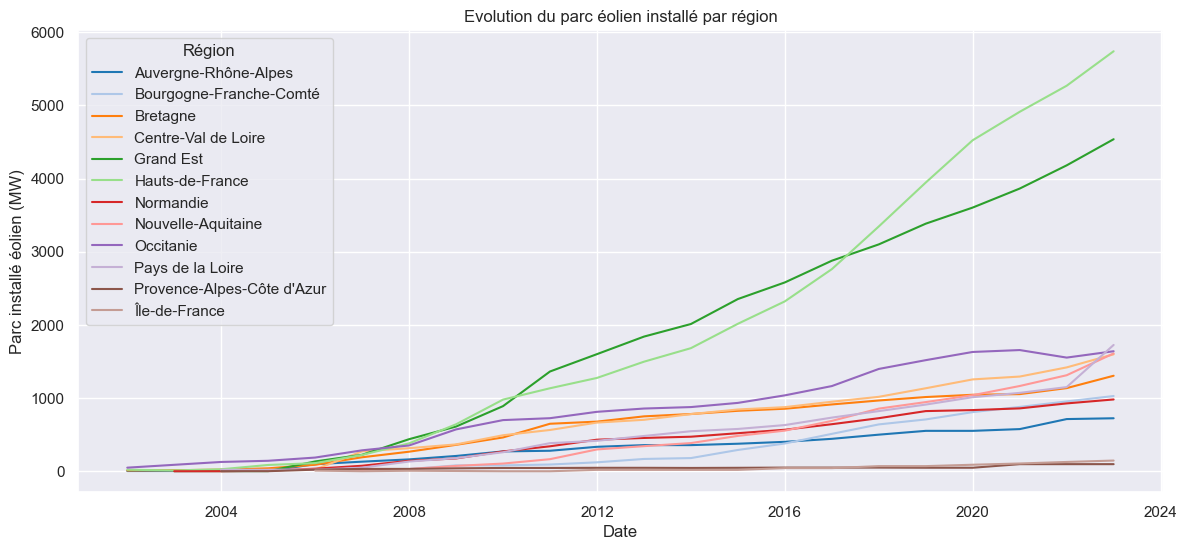

In [20]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=parc_regional_df, x="Date", y="Parc installé éolien (MW)", hue="Région", palette="tab20")
plt.title("Evolution du parc éolien installé par région")
plt.show()

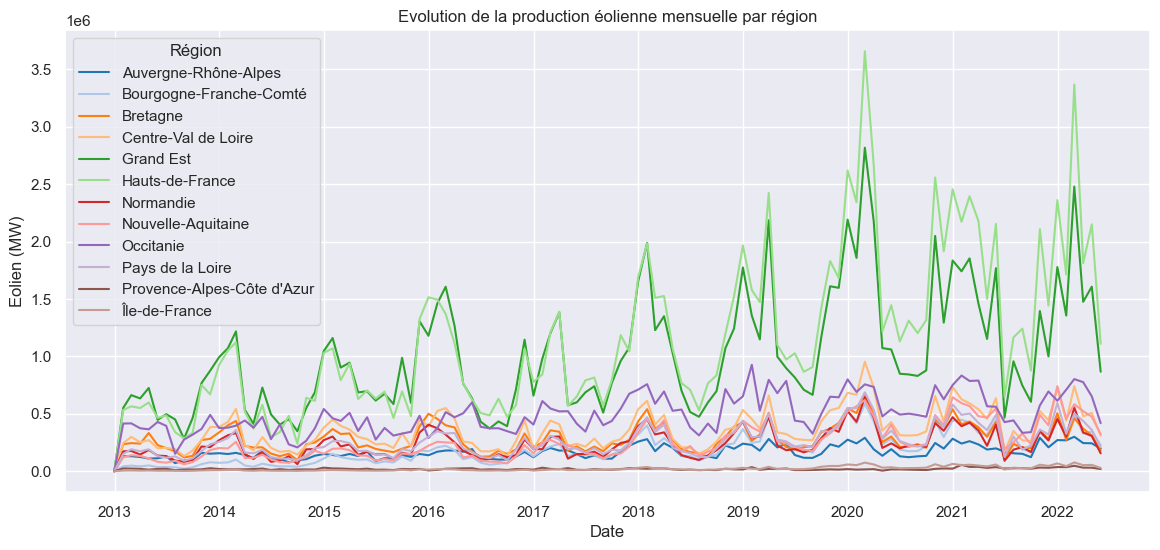

In [21]:
monthy_production_df = production_df.rename(columns={"Date - Heure": "Date"}).set_index("Date").groupby("Région")["Eolien (MW)"].resample("M").sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthy_production_df, x="Date", y="Eolien (MW)", hue="Région", palette="tab20")
plt.title("Evolution de la production éolienne mensuelle par région")
plt.show()

### Normalisation de la production vis-à-vis du parc installé

In [12]:
production_df["TCH Eolien (%)"].isna().sum() / len(production_df)

0.743455497382199

In [23]:
parc_regional_df

,Année,Code INSEE région,Région,Parc installé éolien (MW),Parc installé solaire (MW),Géo-shape région,Géo-point région,Date
53,2001,11,Île-de-France,NaN,NaN,"{""coordinates"": [[[[3.485019233, 48.851845323]...","48.7093154,2.503402421",2001-12-31
118,2001,24,Centre-Val de Loire,NaN,NaN,"{""coordinates"": [[[[1.501397407, 48.941034037]...","47.484775714,1.68439107",2001-12-31
119,2001,27,Bourgogne-Franche-Comté,NaN,NaN,"{""coordinates"": [[[[2.936623684, 48.163455797]...","47.234282007,4.80685684",2001-12-31
120,2001,28,Normandie,NaN,NaN,"{""coordinates"": [[[[1.704350137, 49.232434495]...","49.120068073,0.110921062",2001-12-31
0,2001,32,Hauts-de-France,21.0,NaN,"{""coordinates"": [[[[3.485019233, 48.851845323]...","49.969594242,2.771302607",2001-12-31
...,...,...,...,...,...,...,...,...
185,2022,75,Nouvelle-Aquitaine,1610.0,3876.0,"{""coordinates"": [[[[-1.412478526, 46.184385107...","45.206040306,0.21271768",2022-12-31
117,2022,76,Occitanie,1640.0,3095.0,"{""coordinates"": [[[[-0.07519535, 43.307155125]...","43.702499298,2.143926552",2022-12-31
186,2022,84,Auvergne-Rhône-Alpes,724.0,1821.0,"{""coordinates"": [[[[2.281089687, 46.420473176]...","45.514642251,4.536120089",2022-12-31
284,2022,93,Provence-Alpes-Côte d'Azur,97.0,1957.0,"{""coordinates"": [[[[6.506367702, 43.043784724]...","43.958770072,6.061003389",2022-12-31


In [32]:
parc_regional_interp_df = parc_regional_df.set_index("Date").groupby("Région")["Parc installé éolien (MW)"].resample("M").interpolate(method="linear").reset_index()

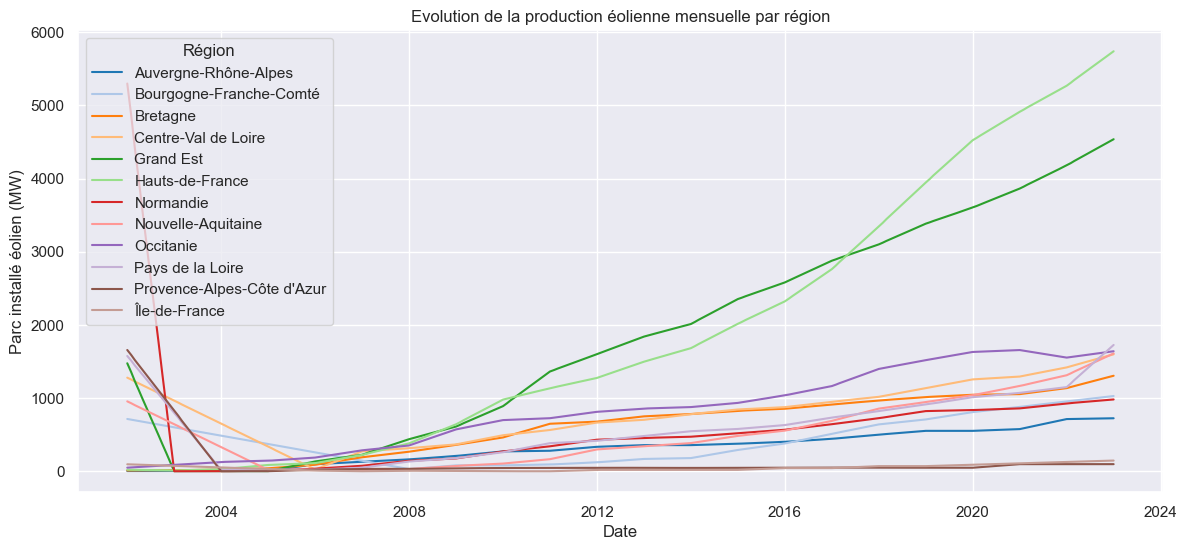

In [33]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=parc_regional_interp_df, x="Date", y="Parc installé éolien (MW)", hue="Région", palette="tab20")
plt.title("Evolution de la production éolienne mensuelle par région")
plt.show()

In [31]:
# TODO: checker le problème du début des courbes

In [41]:
#parc_regional_interp_df["Date"] = pd.to_datetime(parc_regional_interp_df["Date"])

In [46]:
parc_regional_interp_df["Date"] = parc_regional_interp_df["Date"].dt.tz_localize('UTC')

In [51]:
df = pd.merge_asof(production_df.sort_values(["Date", "Région" ]), parc_regional_interp_df.sort_values(["Date", "Région"]), on="Date", by="Région").drop(columns=["index"])

In [53]:
df["Eolien normalisé (MW)"] = df["Eolien (MW)"] / df["Parc installé éolien (MW)"]

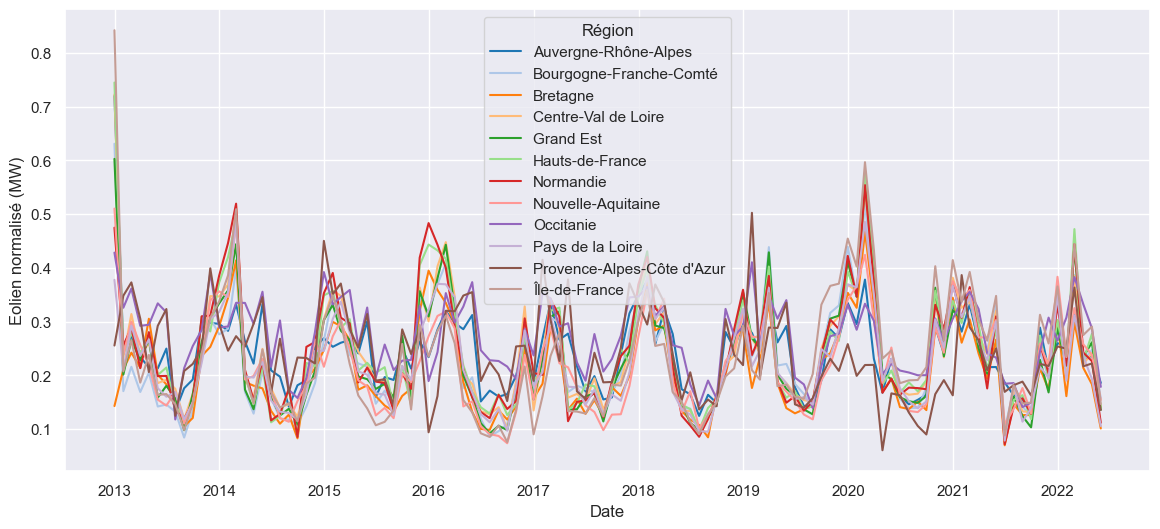

In [55]:
monthy_norm_production_df = df.set_index("Date").groupby("Région")["Eolien normalisé (MW)"].resample("M").mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthy_norm_production_df, x="Date", y="Eolien normalisé (MW)", hue="Région", palette="tab20")
#plt.title("Evolution de la production éolienne mensuelle par région")
plt.show()

### Relation entre production éolienne et paramètres météo

In [12]:
meteo_df.columns

Index(['ID OMM station', 'Date', 'Pression au niveau mer',
       'Variation de pression en 3 heures', 'Type de tendance barométrique',
       'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
       'Température', 'Point de rosée', 'Humidité', 'Visibilité horizontale',
       'Temps présent', 'Temps passé 1', 'Temps passé 2', 'Nebulosité totale',
       'Nébulosité  des nuages de l' étage inférieur',
       'Hauteur de la base des nuages de l'étage inférieur',
       'Type des nuages de l'étage inférieur',
       'Type des nuages de l'étage moyen',
       'Type des nuages de l'étage supérieur', 'Pression station',
       'Niveau barométrique', 'Géopotentiel',
       'Variation de pression en 24 heures',
       'Température minimale sur 12 heures',
       'Température minimale sur 24 heures',
       'Température maximale sur 12 heures',
       'Température maximale sur 24 heures',
       'Température minimale du sol sur 12 heures',
       'Méthode de mesure Température du

In [56]:
meteo_df = meteo_df.rename(columns={"region (name)": "Région"})

In [57]:
production_meteo_df = pd.merge(df, meteo_df, on=["Date", "Région"])

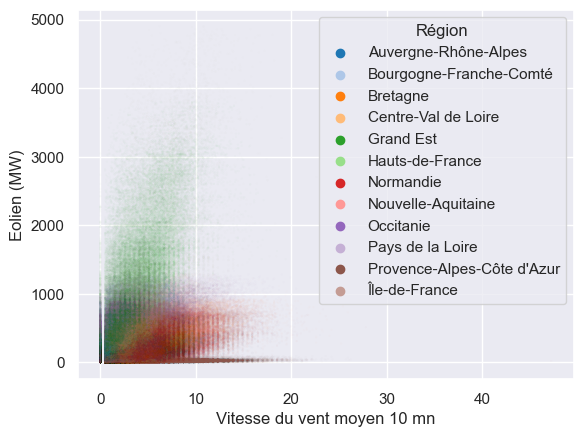

In [58]:
sns.scatterplot(production_meteo_df, x="Vitesse du vent moyen 10 mn", y="Eolien (MW)", alpha=0.01, s=3, hue="Région", palette="tab20")
plt.show()

/home/antonin/.pyenv/versions/3.9.17/envs/prediction-energie-eolienne-venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


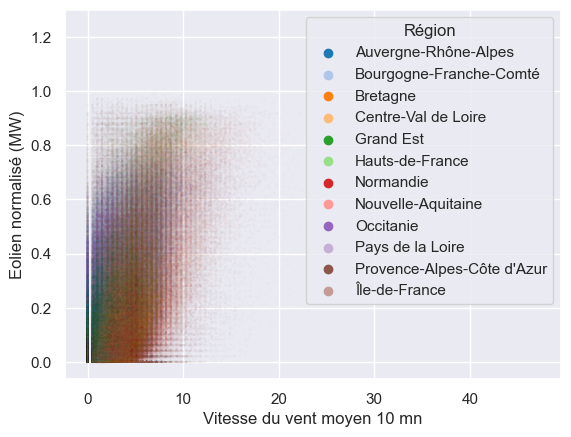

In [59]:
sns.scatterplot(production_meteo_df, x="Vitesse du vent moyen 10 mn", y="Eolien normalisé (MW)", alpha=0.01, s=3, hue="Région", palette="tab20")
plt.show()

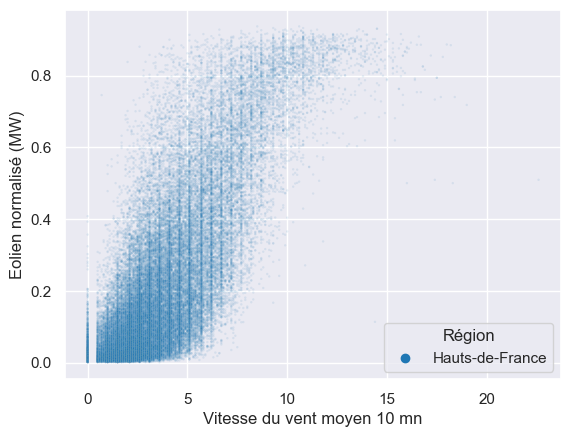

In [61]:
sns.scatterplot(production_meteo_df.query("Région == 'Hauts-de-France'"), x="Vitesse du vent moyen 10 mn", y="Eolien normalisé (MW)", alpha=0.1, s=3, hue="Région", palette="tab20")
plt.show()

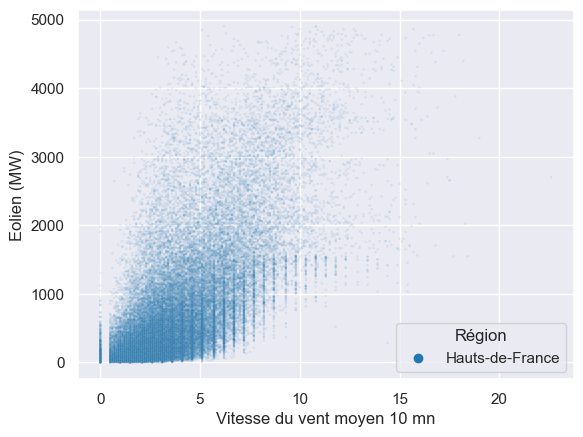

In [62]:
sns.scatterplot(production_meteo_df.query("Région == 'Hauts-de-France'"), x="Vitesse du vent moyen 10 mn", y="Eolien (MW)", alpha=0.1, s=3, hue="Région", palette="tab20")
plt.show()